In [123]:
# import python libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns
import pandoc

In [10]:
# import csv file
df = pd.read_csv('Diwali Sales Data.csv', encoding= 'unicode_escape')

In [11]:
df.shape

(11251, 15)

In [16]:
df.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00,NaN,NaN
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00,NaN,NaN
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99,NaN,NaN


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [19]:
#drop unrelated/blank columns
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [24]:
#check for null values
pd.isnull(df).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [23]:
# drop null values
df.dropna(inplace=True)

In [25]:
# change data type
df['Amount'] = df['Amount'].astype('int')

In [14]:
#to check the data type
df['Amount'].dtypes


dtype('float64')

In [17]:
# to chcek columns names

df.columns

Index(['User_ID', 'Customer_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

In [16]:
df.rename(columns= {'Cust_name':'Customer_name'}, inplace= True)

In [23]:
# describe() method returns description of the data in the DataFrame (i.e. count, mean, std, etc)

df.describe()

,User_ID,Age,Marital_Status,Orders,Amount,Status,unnamed1
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000,0.0,0.0
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858,NaN,NaN
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869,NaN,NaN
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000,NaN,NaN
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000,NaN,NaN
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000,NaN,NaN
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000,NaN,NaN
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000,NaN,NaN


In [22]:
# describe() method for specific columns.
df[['Age','Amount','Orders']].describe()

,Age,Amount,Orders
count,11251.000000,11239.000000,11251.000000
mean,35.421207,9453.610858,2.489290
std,12.754122,5222.355869,1.115047
min,12.000000,188.000000,1.000000
25%,27.000000,5443.000000,1.500000
50%,33.000000,8109.000000,2.000000
75%,43.000000,12675.000000,3.000000
max,92.000000,23952.000000,4.000000


<h1>Exploratory Data Analysis<h2>

<h3>Gender<h3>

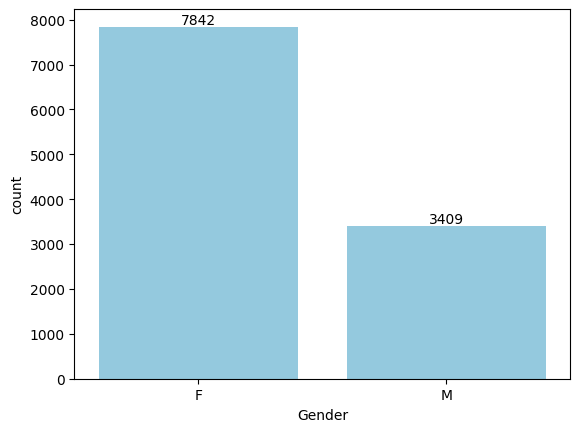

In [80]:
# plotting a bar chart for Gender and it's count

ax = sns.countplot(x = 'Gender',data = df, color = 'skyblue' )
for bars in ax.containers:
 ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

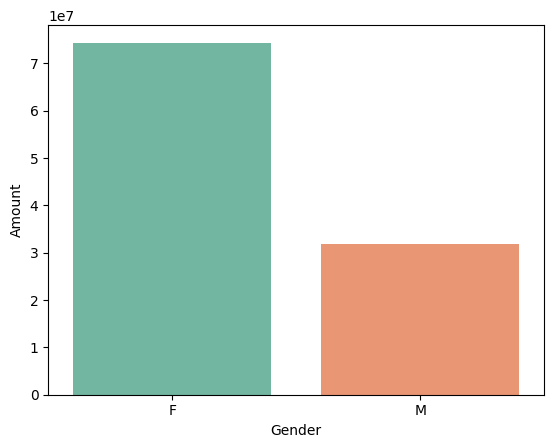

In [75]:
# plotting a bar chart for gender vs total amount

sales_gen = df.groupby(['Gender'], as_index=False) ['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x = 'Gender',y= 'Amount' ,data = sales_gen,hue='Gender', palette='Set2', dodge=False, legend=False)

<h4>From above graphs we can see that most of the buyers are females and even the purchasing
power of females are greater than men<h4>

<h3>AGE<h3>

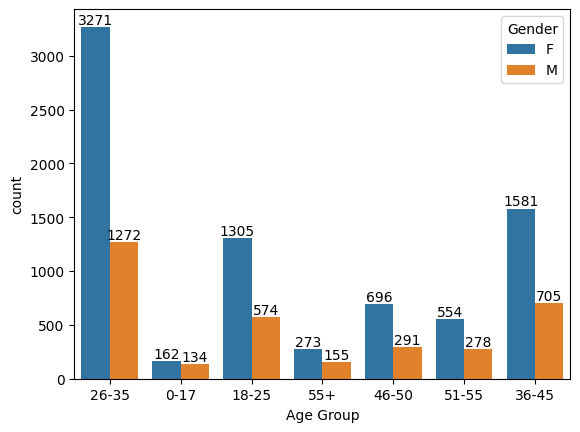

In [61]:
ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender')
for bars in ax.containers:
 ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

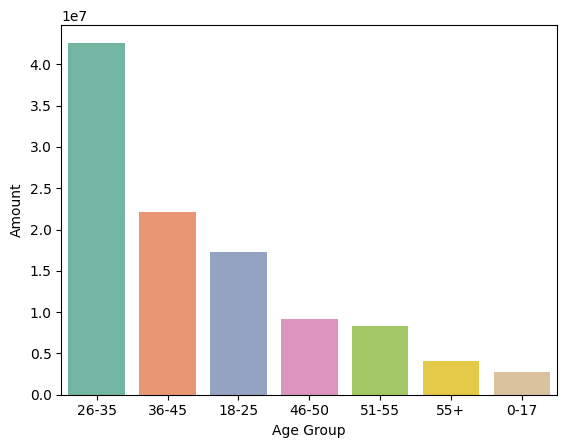

In [74]:
# Total Amount vs Age Group

sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x='Age Group', y='Amount', data=sales_age, hue='Age Group', palette='Set2', dodge=False, legend=False)

<h4>From above graphs we can see that most of the buyers are of age group between 26-35 yrs female<h4>

<h3>State<h3>

<Axes: xlabel='State', ylabel='Orders'>

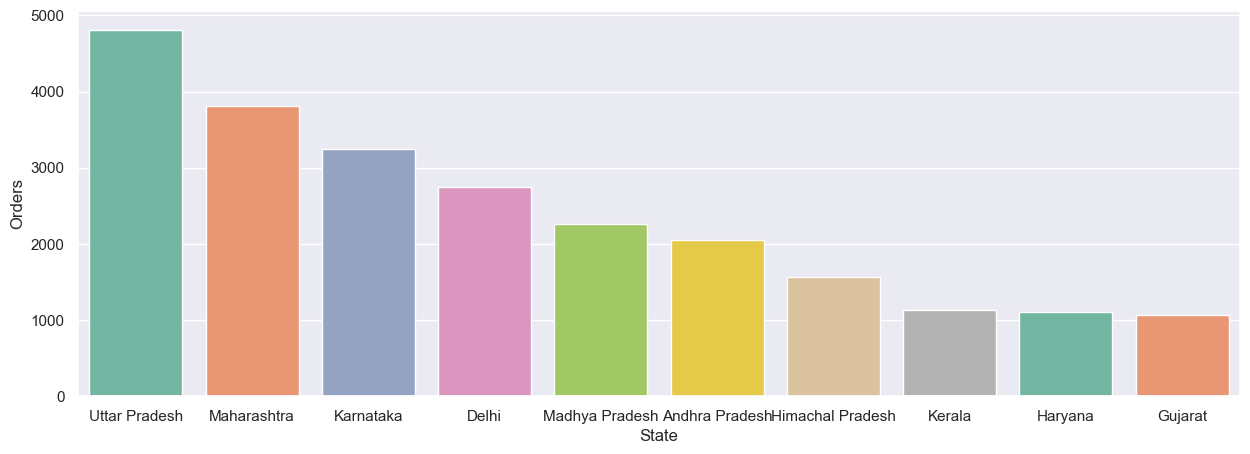

In [98]:
 # total number of orders from top 10 states

sales_state = df.groupby(['State'], as_index=False) ['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Orders',hue='State', palette='Set2', dodge=False, legend=False)


<Axes: xlabel='State', ylabel='Amount'>

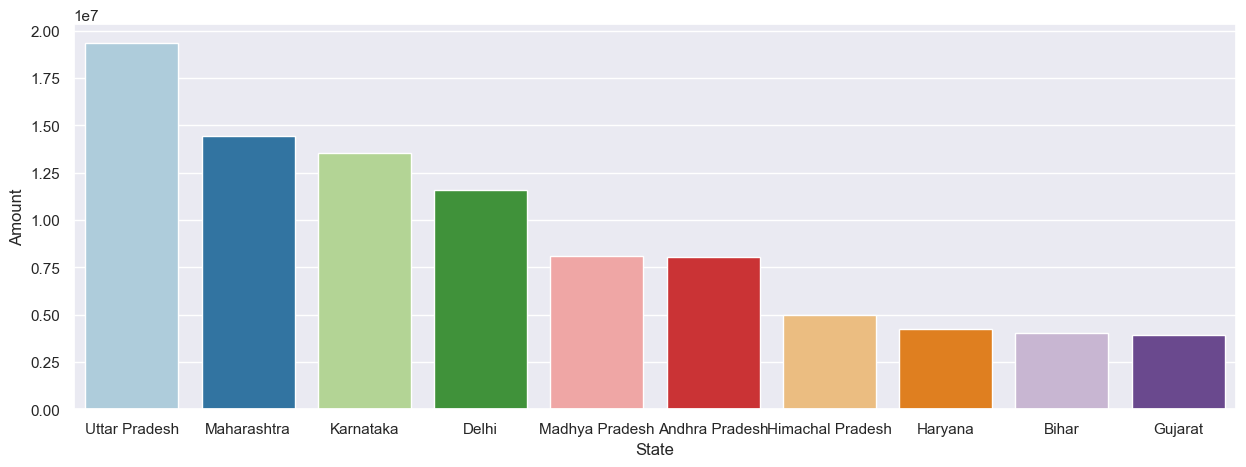

In [92]:
# total amount/sales from top 10 states

sales_state = df.groupby(['State'], as_index=False) ['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Amount',hue='State', palette='Paired', dodge=False, legend=False)


<h4>From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively<h4>


<h3>Marital Status<h3>

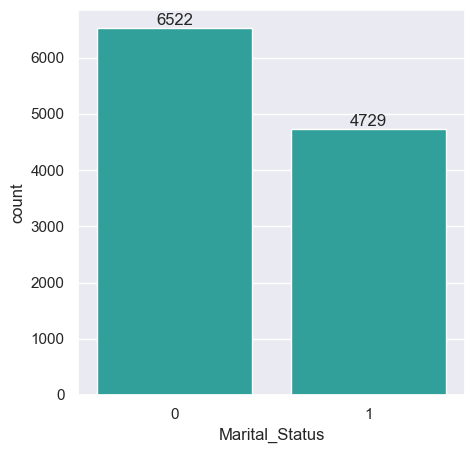

In [127]:
ax = sns.countplot(data = df, x = 'Marital_Status',color = 'LightSeaGreen')
sns.set(rc={'figure.figsize':(5,3)})
for bars in ax.containers:
 ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

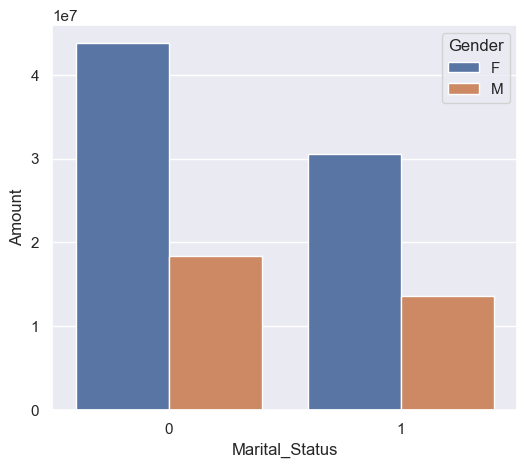

In [101]:
# total count vs Marital_status
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False) ['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data = sales_state, x = 'Marital_Status',y= 'Amount',
hue='Gender')


<h4>From above graphs we can see that most of the buyers are married (women) and they have high purchasing power<h4>


<h3>OCCUPATION<h3>

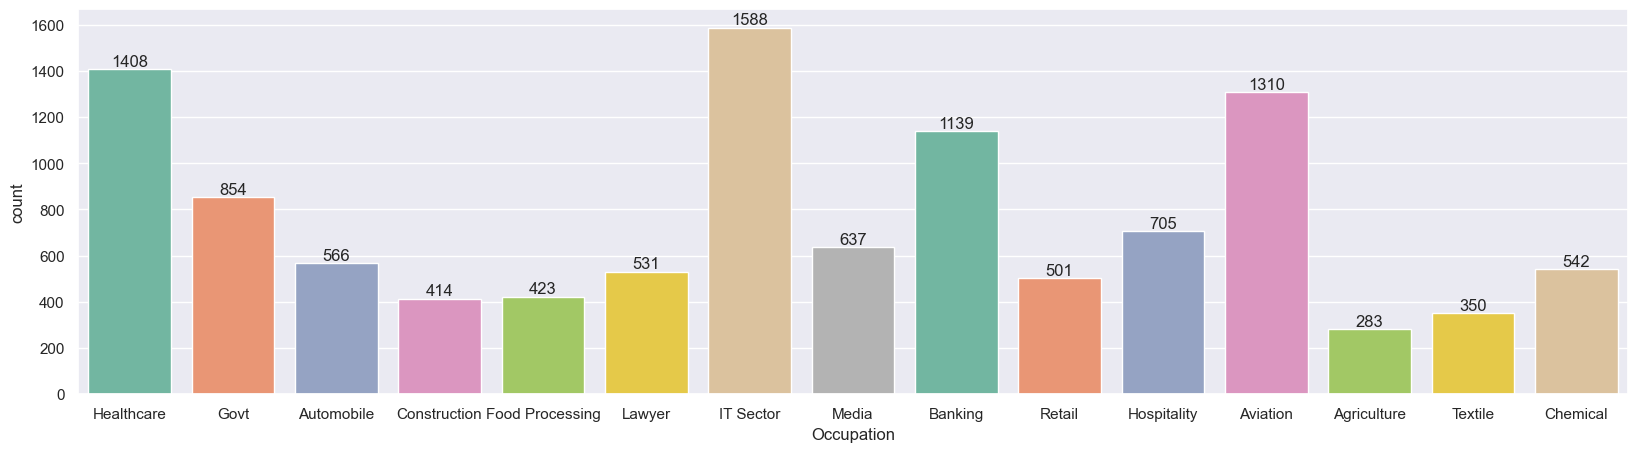

In [105]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Occupation',hue='Occupation', palette='Set2', dodge=False, legend=False)
for bars in ax.containers:
 ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

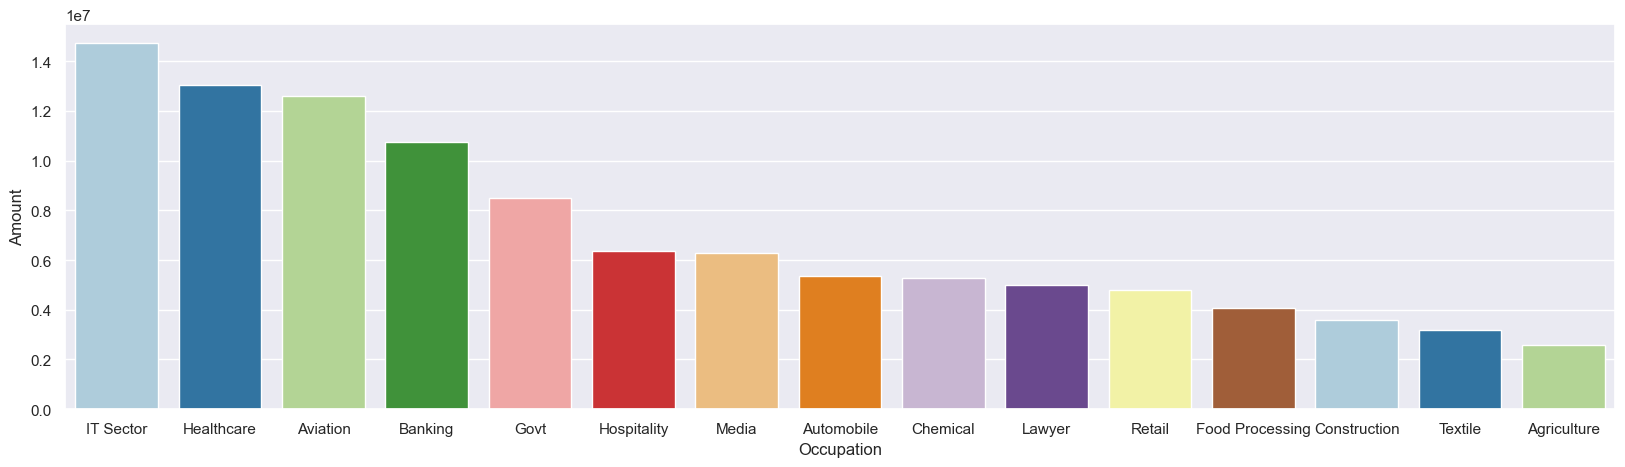

In [107]:
sales_state = df.groupby(['Occupation'], as_index=False) ['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount', hue='Occupation', palette='Paired', dodge=False, legend=False)

<h4>From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector<h4>


<h3>Product Category<h3>

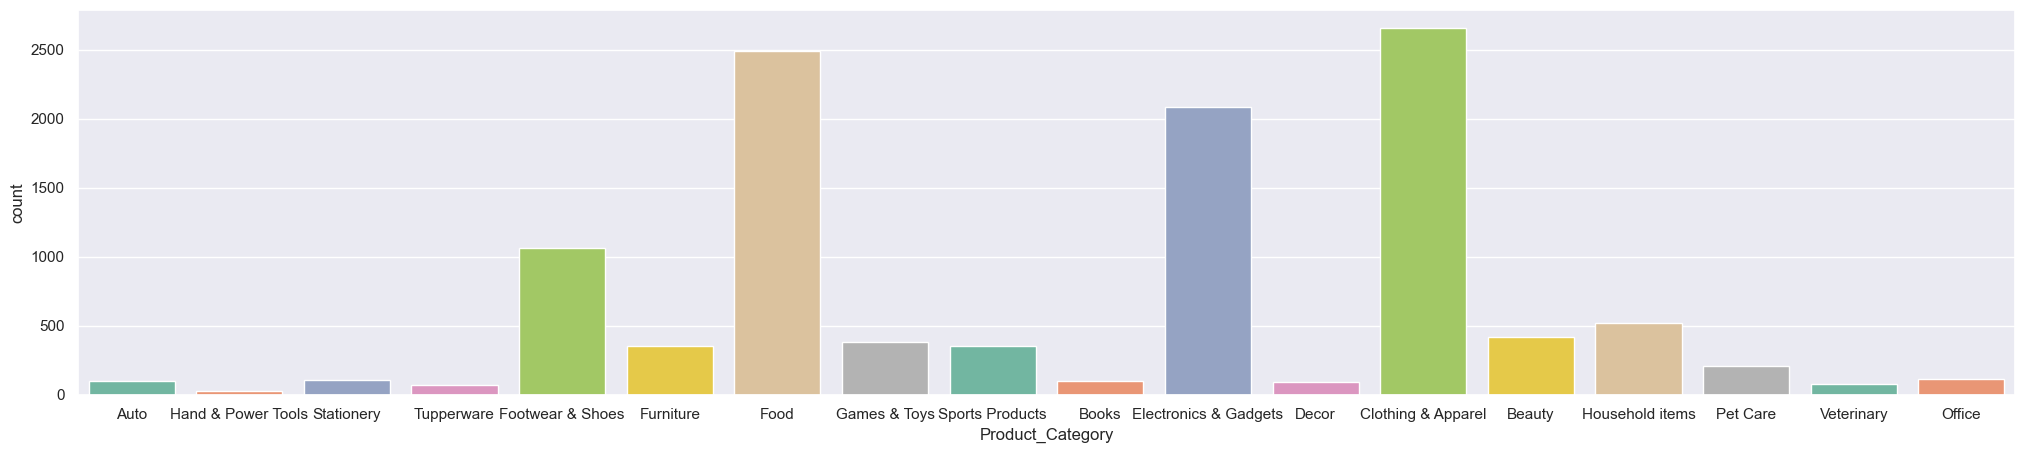

In [128]:
#total count vs produc_category
sns.set(rc={'figure.figsize':(25,5)})
ax = sns.countplot(data = df, x = 'Product_Category',hue='Product_Category', palette='Set2', dodge=False, legend=False)

<Axes: xlabel='Product_Category', ylabel='Amount'>

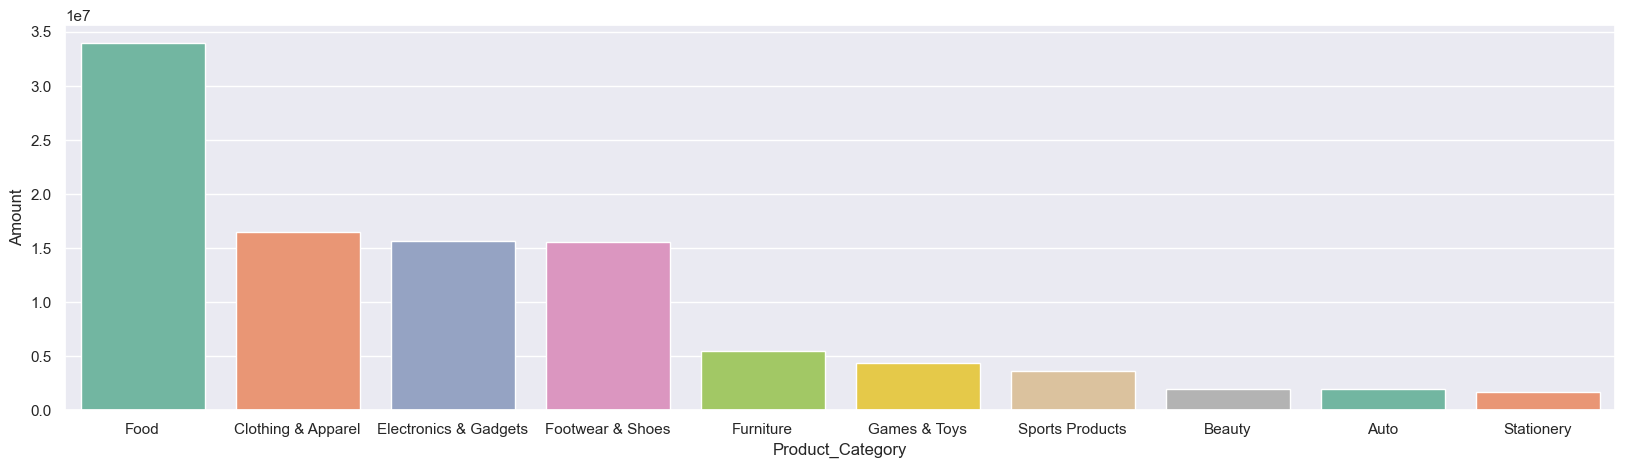

In [114]:
#total amount vs product_category
sales_state = df.groupby(['Product_Category'], as_index=False) ['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_Category',y= 'Amount',hue='Product_Category', palette='Set2', dodge=False, legend=False)

<h3>From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category<h3>

<Axes: xlabel='Product_ID', ylabel='Orders'>

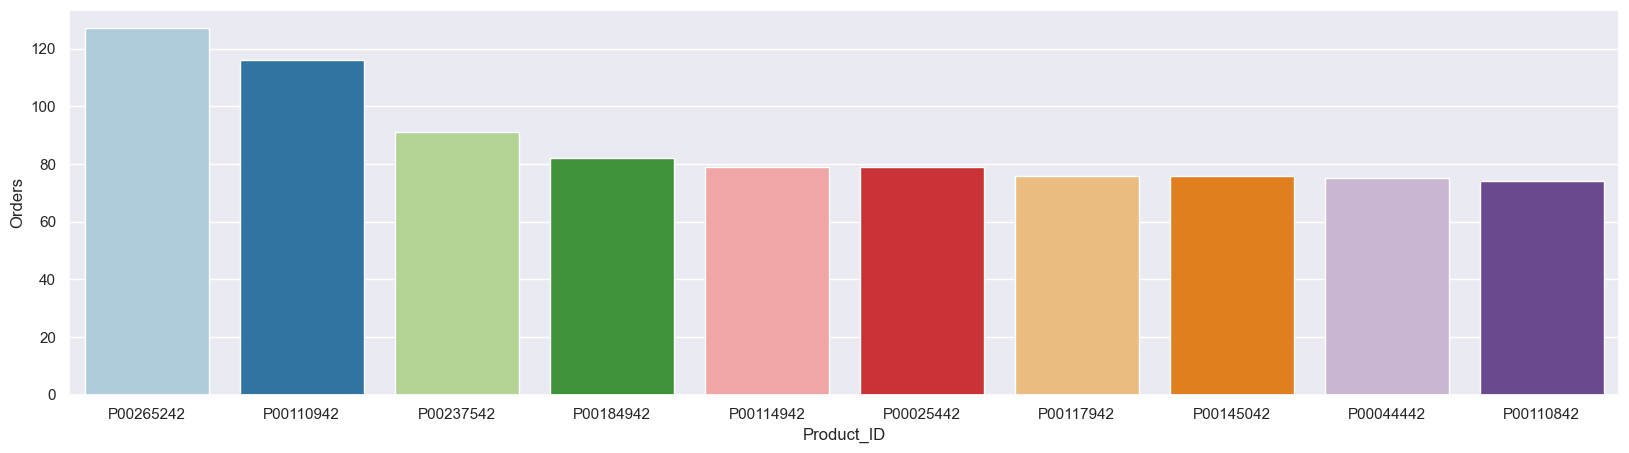

In [118]:
#total order as per product_id
sales_state = df.groupby(['Product_ID'], as_index=False) ['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders',hue='Product_ID', palette='Paired', dodge=False, legend=False)

<Axes: xlabel='Product_ID'>

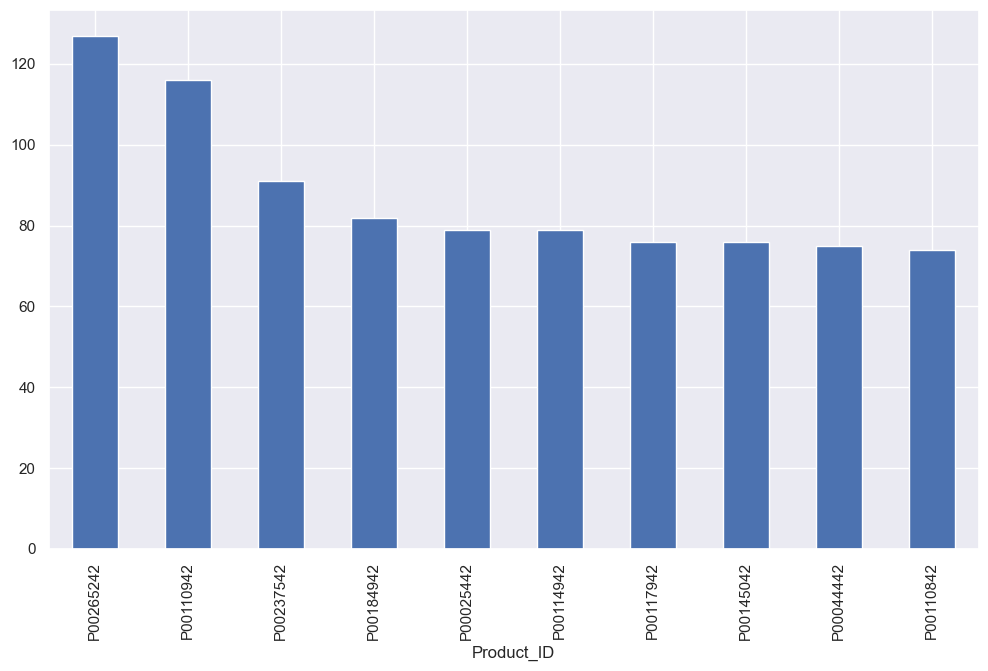

In [121]:
# top 10 most sold products (same thing as above)

fig1, ax1 = plt.subplots(figsize=(12,7))
df.groupby('Product_ID') ['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

<h1>Conclusion:<h1>

<h3>Married women age group 26-35 yrs from UP, Maharastra and Karnataka working in IT,
Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics
category<h3>

<h4>Thank you!<h4>